In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

In [2]:
def load_data(data_path):
    df = pd.read_csv(data_path, sep='\t')
    df = df.sort_values(by=['Incident ID'])
    return df


In [3]:
data = load_data('./data/incidentProcess_custom.csv')

In [4]:
def incident_sorted_list(data, incident_id):
    '''
    '''
    df = pd.DataFrame()
    df = data[data['Incident ID'] == incident_id] # select all rows with incident_id
    df['ActivityTimeStamp'] = pd.to_datetime(df['ActivityTimeStamp']) # parse as timestamp
    df['ActivityTimeStamp'] = df['ActivityTimeStamp'].apply(
        lambda x: dt.datetime.strftime(x, '%Y-%d-%m %H:%M:%S')) # transform
    df = df.sort_values(by=['ActivityTimeStamp'], ascending=True)
    # print(df)
    return df

In [5]:
def check_ping_pong(df):
    pingpong = 0
    for i in range(df.shape[0] - 1):
        activityA = df['Activity'].iloc[i]
        activityB = df['Activity'].iloc[i+1]
        if activityA == activityB:
            if df['Assignment Group'].iloc[i] != df['Assignment Group'].iloc[i+1]:
                # hier dus eigenlijk een lijst met tuple (teamA en TeamB plus timestamps en misschien ook de activiteit in kwestie) returnen en na alle incidenten opslaan
                # print(df['Assignment Group'].iloc[i])
                # print(df['Assignment Group'].iloc[i+1])
                pingpong += 1
    return pingpong

In [6]:
def get_unique_incidents(df):
    return list(df['Incident ID'].unique())

In [7]:
get_unique_incidents(data)[100]

'IM0000147'

In [8]:
pd.options.mode.chained_assignment = None

In [16]:
pingpong_df = pd.DataFrame()

for (pos, i_id) in enumerate(get_unique_incidents(data)):
    if pos == 1000:
        break
    sorted_incident = incident_sorted_list(data, i_id)
    pings = check_ping_pong(sorted_incident)
    pingpong_df = pingpong_df.append({"Incident ID": i_id, "pings": pings}, ignore_index=True)

/var/folders/cm/h79y216x7h7cxp2qwwbk2k940000gn/T/ipykernel_27696/163988528.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pingpong_df = pingpong_df.append({"Incident ID": i_id, "pings": pings}, ignore_index=True)
/var/folders/cm/h79y216x7h7cxp2qwwbk2k940000gn/T/ipykernel_27696/163988528.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pingpong_df = pingpong_df.append({"Incident ID": i_id, "pings": pings}, ignore_index=True)
/var/folders/cm/h79y216x7h7cxp2qwwbk2k940000gn/T/ipykernel_27696/163988528.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pingpong_df = pingpong_df.append({"Incident ID": i_id, "pings": pings}, ignore_index=True)
/var/folders/cm/h79y216x7h7cxp2qwwbk2k940000gn/T/ipykernel_27696/163988528.py:8

In [25]:
print(pingpong_df['pings'].min())

0


(array([674., 191.,  69.,  37.,  12.,   5.,   6.,   2.,   1.,   3.]),
 array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18., 20.]),
 <BarContainer object of 10 artists>)

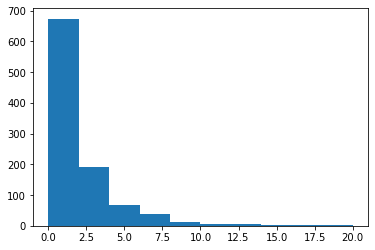

In [18]:
plt.hist(pingpong_df['pings'])